<a href="https://colab.research.google.com/github/jdamaster/machineLearningDiplomat/blob/master/s06_Analisys_anova%2C_regresion_lineal_e_introduccion_a_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

<p><a name="contents"></a></p>

# Contenido Sesión 6: Introducción al Machine Learning:


- <a href="#anova2">1. ANOVA II</a><br>
  - <a href="#intro">1.1. Introducción</a><br> 
  - <a href="#oneway">1.2. One-way ANOVA varios grupos</a><br>
- <a href="#ML">2. Modelos basados en datos y Machine Learning</a><br>
  - <a href="#modelML">2.1. Modelos que se pueden construir</code></a><br>
  - <a href="#terms">2.2. Terminología</code></a><br>
  - <a href="#supML">2.3. Aprendizaje supervisado</code></a><br>
  - <a href="#nonsupML">2.4. Aprendizaje no supervisado</code></a><br>
  - <a href="#data">2.5. Observaciones acerca de los datos</code></a><br>
- <a href="#sklearn">3. Introducción a Scikit-Learn</a><br>
  - <a href="#sklearnG">3.12 Generalidades</a><br>
  - <a href="#sklearnT">3.2. Tratamiento de datos</a><br>
    - <a href="#sklearnTT">3.2.1 Datos de entrenamiento y de prueba</a><br>
    - <a href="#sklearnCT">3.2.2 Conversión de variables categóricas</a><br>
    - <a href="#sklearnFS">3.2.3 Escalamiento de características</a><br>
    - <a href="#sklearnPL">3.2.4 Pipeline</a><br>
- <a href="#regresion">4. Regresión lineal</a><br>
  - <a href="#simple">4.1 Regresión lineal simple</a><br>
  - <a href="#multiple">4.2 Regresión lineal multiple</a><br>
    - <a href="#ridge">4.3.1 Regresión lineal Ridge</a><br>
    - <a href="#lasso">4.3.2 Regresión lineal Lasso</a><br>
- <a href="#taller">5. Taller</a><br>


Objetivos:

* Introducir el vocabulario y los conceptos fundamentales del Machine Learning (ML).
* Presentar la API Scikit-Learn y mostrar algunos ejemplos de su uso.
* Explorar los enfoques de ML más importantes y desarrollar una intuición sobre cómo funcionan y cuándo y
donde son aplicables


<p><a name="anova2"></a></p>

# 1. ANOVA II.

<p><a name="intro"></a></p>

## 1.1. Introducción:

[[Contenidos]](#contents)

El el test one-way ANOVA es una técnica que es usada para variables blanco numéricas ("Y", siguendo la notación establecida), usualmente una variable, y datos de entrada de solo una variable numérica o categórica, por tal motivo se le conoce como "one-way".

El test de análisis de varianzas puede pensarse como una generalización del t-test a más de dos grupos. En ANOVA, la **hipotesis nula** establece que **las medias de las poblaciones de las cuales se tomaron las muestras de los grupos son iguales**. De forma más concisa tenemos que:

 $\mu_1=\cdots=\mu_n$
 

Para un grupo de $n$ datos. La hipótesis alternativa sería que alguna de las medias de la ecuación anterior no se cumpla. Por lo tanto, tener un F-value alto y un p-value pequeño, implica que la probabilidad de que la hipótesis nula sea cierta es baja, por tanto, decimos que la hipotesis alternativa se debe cumplir.

Supongamos que queremos analizar una variable categórica y ver la correlación con otras variables. 

Uno de los principales usos de ANOVA es el de analizar el impacto que las subcategorías tienen sobre en otra variable. 

Por ejemplo, en el caso del dataset de carros, resultaría interesante responder a la pregunta:

* ¿Qué subcategorias de la categoría make (Fabricantes de carros), tienen algun impacto sobre la variable precio?.

Empecemos por cargar los datos de carros y volverlos a inspeccionar:

Realicemos una gráfica del precio medio en función de la de la marca, con el fin de analizar si existe alguna dependencia.

In [0]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

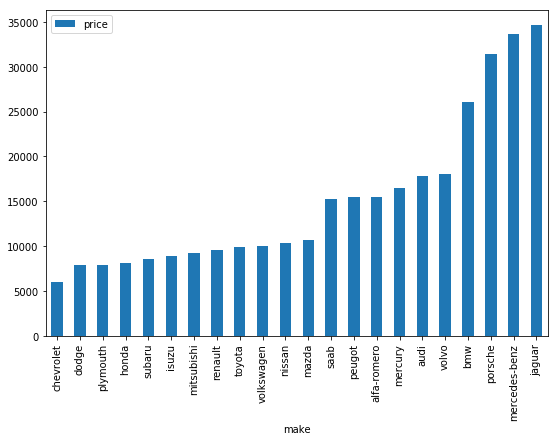

In [0]:
dftest1 = df[["make","price"]].groupby("make").mean().sort_values(by="price")
dftest1.plot(kind="bar",figsize=(9,6))

De este gráfica se puede observar que existe una  variación del precio medio a medida que nos movemos de izquierda a derecha en las diferentes marcas, no obstente, no sabemos cual marca de carro tienen el impacto más alto y cual menos en la predicción del precio. 

Mediante ANOVA podemos ver si existe una diferencia significativa entre las medias de los precios de dos o más marcas.

Recuerdemos que ANOVA retorna dos valores:

* F-value: Que representa la razón de la variación entre la media de los grupos y la variación dentro de cada grupo.

* p-value: Que representa la probabilidad de que la hipótesis nula (medias iguales) sea cierta. El valor p respresenta entonces, la significancia estadística.

Veamos en una grafica de boxplots como se relacionan las diferentes marcas segun el precio.

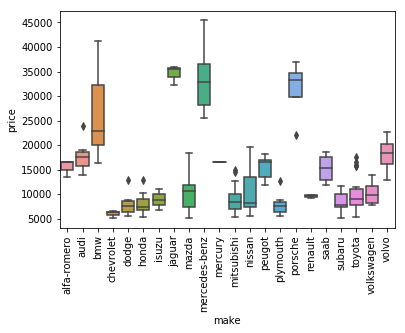

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="make", y="price", data=df[["make","price"]])
plt.xticks(rotation=90)
plt.show()

De esta gráfica resulta dificil establecer si existe una correlación entre la variable categórica "marca" y el precio.

Con el fin de comprender más a fondo la finalidad de ANOVA y lo que mide, intentemos diferenciar entre precios de carro según las marcas.

Iniciemos la comparación entre dos grupos de marcas, aunque la finalidad de ANOVA consiste en diferenciar más de dos grupos (para diferenciar solo dos grupos, la prueba más adecuada es la t-student).

De la base de datos de carros, extraigamos solo la marca y el precio y almacenémoslo en un nuevo dataFrame:

In [0]:
df_test = df[["make","price"]]
df_test.head()

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0


Creemos una función que nos sirva para escoger dos marcas dadas dentro de la columna de make y que la guarde con el respectivo precio en una nueva variable. Sea esta función escoger2marcas:

In [0]:
def escoger2marcas(df,marca1,marca2):
  locations = [bool(df.loc[i][0]==marca1)|bool(df.loc[i][0]==marca2) for i in range(len(df))]
  marca1_marca2 = df.loc[:][locations]
  
  return marca1_marca2

Establezcamos dos pares de marcas cuyo valor medio difieran notablemente y cuyo valor medio sean aproximados con el fin de ver los resultados de un test ANOVA:

* Medias diferentes honda vs volvo.
* Medias similares volkswagen vs nissan.

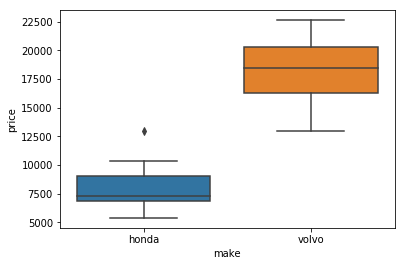

In [0]:
# Grupos de medias diferentes
honda_volvo = escoger2marcas(df_test,"honda","volvo")
sns.boxplot(x="make", y="price", data=honda_volvo)

Si comparamos dos grupos muy diferentes obtenemos un F-value elevado y un p-value pequeño.

Apliquemos ANOVA con scipy.stats:

NOTA: la función que verán a continuación de `get_group()` obtienen el subgrupo que se le pase al argumento dentro de una lista, es decir, `test2.get_group('reanault')` devuelve una lista del dataframe solo con la subcategoria `renault`.

Agrupemos primero por fabricante el data frame:


In [0]:
df_test2 = df[['make', 'price']].groupby(['make'])
print(df_test2.get_group('honda'))
print(df_test2.get_group('volvo'))

     make    price
29  honda   6479.0
30  honda   6855.0
31  honda   5399.0
32  honda   6529.0
33  honda   7129.0
34  honda   7295.0
35  honda   7295.0
36  honda   7895.0
37  honda   9095.0
38  honda   8845.0
39  honda  10295.0
40  honda  12945.0
41  honda  10345.0
      make    price
190  volvo  12940.0
191  volvo  13415.0
192  volvo  15985.0
193  volvo  16515.0
194  volvo  18420.0
195  volvo  18950.0
196  volvo  16845.0
197  volvo  19045.0
198  volvo  21485.0
199  volvo  22470.0
200  volvo  22625.0


Realicemos el test ANOVA mediante la librería de scipy y el módulo de stats:

In [0]:
from scipy import stats

f_val, p_val = stats.f_oneway(df_test2.get_group('honda')['price'], df_test2.get_group('volvo')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 79.51335772254384 , P = 9.307852725853743e-09


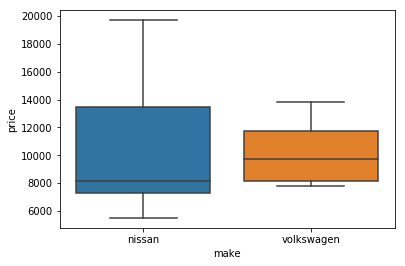

In [0]:
# Grupos de medias similares
honda_volvo = escoger2marcas(df_test,"volkswagen","nissan")
sns.boxplot(x="make", y="price", data=honda_volvo)

In [0]:
f_val, p_val = stats.f_oneway(df_test2.get_group('volkswagen')['price'], df_test2.get_group('nissan')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.058661339194129865 , P = 0.8103896431706177


Vemos que con ANOVA tenemos una "forma cuantitativa" de corroborar la inspección visual que se realiza con los boxplots.

Los resultados del test ANOVA para la comparación de este par de los grupos de marcas de carros es el siguiente:

honda vs volvo: El test ANOVA arroja un F-value alto y un p-value pequeño, lo que implica que deberíamos rechazar la hipótesis nula de que las medias de los grupos son aproximadamente iguales. En este sentido ambos grupos son diferentes y guardarian correlación con el precio.
volkswagen vs nissan: El test ANOVA arroja un F-value bajo y un p-value alto, lo que indica que debemos aceptar la hipótesis nula de que las medias son aproximadamente iguales y no guardarían correlación con el precio.

**Recapitulando**:

El test de análisis de varianzas (ANOVA - Analysis Of Variance) es un método estadístico usado para provar las diferencias entre dos o más grupos.

ANOVA se usa para el análisis de diferencias generales, en lugar de específicas, entre medias.

Mediante un test ANOVA, podemos averiguar si los resultados de un experimento o encuesta son significativos. En otras palabras, el test ANOVA nos permite rechazar o aceptar la hipótesis nula. Básicamente, lo que se hace es probar si existe una diferencia entre grupos. Algunos ejemplos en los que se puede aplicar este método son:

Un grupo de pacientes psiquiátricos está probando tres terapias diferentes: asesoramiento, medicación y biorretroalimentación, en el que se desea ver si una terapia es mejor que las otras.

Un fabricante que tiene dos procesos diferentes para hacer bombillas y quieren saber si un proceso es mejor que el otro.

Los estudiantes de diferentes universidades realizan el mismo examen y se desea ver si una universidad supera a la otra.

<p><a name="oneway"></a></p>

## 1.1. One-way ANOVA: Incluyendo varios grupos.

[[Contenidos]](#contents)

Apliquemos ahora un test ANOVA sobre todos los grupos conformados por las diferentes marcas para ver su relación con el precio.

Tengamos que ANOVA lo podemos aplicar de dos formas:

1.   Mediante el módulo `stats` de `scipy`
2.   Mediante el módulo `statmodels`, ajustando un modelo a los datos.

Ambos métodos son similares pero cuentan con implementaciones de fondo, ligeramente diferentes , por lo que los resultados obtenidos de los valores F-value y p-value son, también, ligeramente diferentes.



**ANOVA - mediante el módulo stats de scipy**:

Procedamos a ver todas las marcas de carros de nuestro dataset:

In [0]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [0]:
from scipy import stats
f_val, p_val = stats.f_oneway(df_test2.get_group('alfa-romero')['price'],df_test2.get_group('audi')['price'],df_test2.get_group('bmw')['price'],df_test2.get_group('chevrolet')['price'],df_test2.get_group('dodge')['price'],df_test2.get_group('honda')['price'],df_test2.get_group('jaguar')['price'],df_test2.get_group('mazda')['price'],df_test2.get_group('mercedes-benz')['price'],df_test2.get_group('mercury')['price'],df_test2.get_group('mitsubishi')['price'],df_test2.get_group('nissan')['price'],df_test2.get_group('peugot')['price'],df_test2.get_group('plymouth')['price'],df_test2.get_group('porsche')['price'],df_test2.get_group('renault')['price'],df_test2.get_group('saab')['price'],df_test2.get_group('subaru')['price'],df_test2.get_group('toyota')['price'],df_test2.get_group('volkswagen')['price'],df_test2.get_group('volvo')['price'])  
   
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 34.6926644878663 , P = 8.007511322526291e-51


**ANOVA - mediante statsmodels:**

In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

results = ols('price ~ C(make)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     33.23
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           1.07e-50
Time:                        13:27:51   Log-Likelihood:                -1930.1
No. Observations:                 201   AIC:                             3904.
Df Residuals:                     179   BIC:                             3977.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  1.55e+04   2191.253      7.073      0.000    1.12e+04    1.98e+04
C(make)[T.audi]           2360.8333   2683.726      0.880      0.380   -2934.978    7656.645
C(make)[T.bmw]            1.062e+04   2569.472      4.133      0.000    5550.063    1.57e+04
C(make)[T.chevrolet]     -9491.3333   3098.900     -3.063      0.003   -1.56e+04   -3376.257
C(make)[T.dodge]         -7622.8889   2530.241     -3.013      0.003   -1.26e+04   -2629.950
C(make)[T.honda]         -7313.6410   2430.977     -3.009      0.003   -1.21e+04   -2516.580
C(make)[T.isuzu]         -6581.8333   3464.676     -1.900      0.059   -1.34e+04     255.030
C(make)[T.jaguar]          1.91e+04   3098.900      6.164      0.000     1.3e+04    2.52e+04
C(make)[T.mazda]         -4845.4510   2376.748     -2.039      0.043   -9535.500    -155.402
C(make)[T.mercedes-benz]  1.815e+04   2569.472      7.063      0.000    1.31e+04    2.32e+04
C(make)[T.mercury]        1004.6667   4382.507      0.229      0.819   -7643.357    9652.691
C(make)[T.mitsubishi]    -6258.5641   2430.977     -2.575      0.011   -1.11e+04   -1461.504
C(make)[T.nissan]        -5082.6667   2366.824     -2.147      0.033   -9753.133    -412.200
C(make)[T.peugot]           -9.2424   2472.067     -0.004      0.997   -4887.386    4868.901
C(make)[T.plymouth]      -7534.9048   2619.049     -2.877      0.005   -1.27e+04   -2366.722
C(make)[T.porsche]         1.59e+04   2898.756      5.486      0.000    1.02e+04    2.16e+04
C(make)[T.renault]       -5903.3333   3464.676     -1.704      0.090   -1.27e+04     933.530
C(make)[T.saab]           -275.0000   2683.726     -0.102      0.918   -5570.811    5020.811
C(make)[T.subaru]        -6957.0833   2449.896     -2.840      0.005   -1.18e+04   -2122.691
C(make)[T.toyota]        -5612.5208   2291.668     -2.449      0.015   -1.01e+04   -1090.361
C(make)[T.volkswagen]    -5420.8333   2449.896     -2.213      0.028   -1.03e+04    -586.441
C(make)[T.volvo]          2564.8485   2472.067      1.038      0.301   -2313.295    7442.992
==============================================================================
Omnibus:                       30.411   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.610
Skew:                           0.777   Prob(JB):                     1.39e-12
Kurtosis:                       5.027   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(make),1.005272e+10,21.0,33.232103,1.068343e-50
Residual,2.578454e+09,179.0,NaN,NaN


De los resultados del test ANOVA para todas las las marcas, podemos concluir que puede ser un buen predictor del precio, no obstante, no podemos concluir cuales marcas no aportan diferencias en relación al precio.

Para hallar los grupos que contribuyen más a diferenciar los precios y cuales menos, debemos hacer un test post-hoc.

**Test Post-hoc:**

No entraremos en detalle sobre la parte teórica de un test post-hoc, sino que nos centraremos los resultados que arroja la prueba.

Hay algunas técnicas diferentes que se pueden utilizar para establecer que grupos contribuyen o no a diferenciar el precio. Cada una de estas técnicas tiene diferentes formas de controlar el [tasa de error por familia](https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/anova/supporting-topics/multiple-comparisons/what-are-individual-and-family-error-rates/). Los métodos principales que pueden encontrarse en python son:

* Fisher’s Least Significant Difference (LSD).
* Bonferroni correction.
* Tukey’s HSD.

Usemos el último de estos para hacer un test post-hoc.

In [0]:
#Implementemos el método de Turkey's:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['price'], df['make'])
mc_results = mc.tukeyhsd()
print(mc_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1        group2      meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------------
  alfa-romero          audi   2360.8333    0.9  -7432.6038  12154.2704  False
  alfa-romero           bmw  10620.4167 0.0097   1243.9145  19996.9188   True
  alfa-romero     chevrolet  -9491.3333 0.2401 -20799.8204   1817.1538  False
  alfa-romero         dodge  -7622.8889 0.2683 -16856.2299   1610.4522  False
  alfa-romero         honda   -7313.641 0.2707 -16184.7482   1557.4661  False
  alfa-romero         isuzu  -6581.8333    0.9 -19225.1063   6061.4396  False
  alfa-romero        jaguar  19101.6667  0.001   7793.1796  30410.1538   True
  alfa-romero         mazda   -4845.451    0.9 -13518.6647   3827.7627  False
  alfa-romero mercedes-benz  18148.6667  0.001   8772.1645  27525.1688   True
  alfa-romero       mercury   1004.6667    0.9 -14987.9491  1699

El test post-hoc Turkey HDS contrala el error tipo I y mantienen el la tasa de error familiar en 0.05 (en la tabla se indica como FWER=0.05). Sobre la tabla anterior se tiene que: 
* Las columnas "grupo1" y grupo2 corresponden a los grupos que son comparados. 
* `meandiff` representa la diferencia en valores medios de los grupos calculados (group1-group2).
* Las columnas `lower` y `upper` corresponden a los límites inferior y superior del intervalo de confianza del 95%.
* En la columna `reject` se establece si debemos rechazar o no la hipotesis nula (medias iguales). 

<p><a name="ML"></a></p>

# 2. Modelos basados en datos y Machine Learning

[Contenidos](#contents) 

<p><a name="modelML"></a></p>

## 2.1. Modelos que se pueden construir

[Contenidos](#contents)


¿Qué es un modelo derivado de los datos?

Caso ideal: Sabemos las distribuciones de las que vienen los datos. ⇒ podemos calcular analíticamente nuestro modelo.

¿Podemos encontrar un modelo con 100% de acierto? ¿Por qué sí, o por qué no?



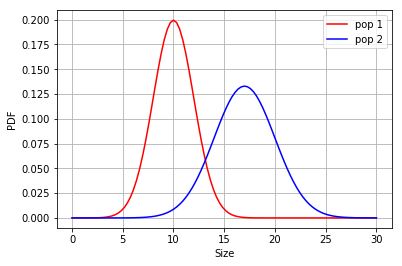

In [0]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt


d1 = stats.norm(loc=10,scale=2)
d2 = stats.norm(loc=17,scale=3)


x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.xlabel('Size')
plt.ylabel('PDF')
plt.grid()
plt.legend();

**Cálculo de la frontera óptima** (conocida también como _frontera bayesiana_).

frontera óptima en 13.15


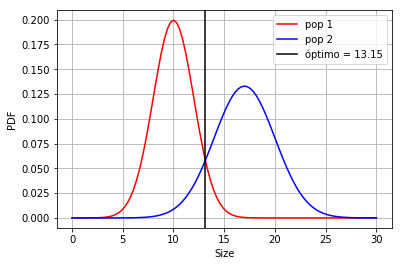

In [0]:
x = np.linspace(5,25,1000)
minx = x[np.argmin(np.abs(d1.pdf(x)-d2.pdf(x)))]

print ("frontera óptima en %.2f"%minx)

x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.axvline(minx, color="black", label=u"óptimo = %.2f"%minx)
plt.xlabel('Size')
plt.ylabel('PDF')
plt.grid()
plt.legend();

Cálculo analítico de los errores de clasificación

In [0]:
print ("pop 1 error", 1-d1.cdf(minx))
print ("pop 2 error", d2.cdf(minx))

pop 1 error 0.05773516274534907
pop 2 error 0.09957961739117976


### Caso 1D

**Caso real**: Tenemos una muestra de los datos 

$\rightarrow$ ¿Cómo determinamos donde poner la frontera?

$\rightarrow$ ¿Qué frontera qusiéramos obtener?

In [0]:
# Función para construir y graficar datasets con dos grupos, rojos y azules, en una dimensión
def show_1D_dataset_samples(n, n_datasets=10, dot_alpha=.5, line_alpha=.5, figsize=(20,5)):
    from sklearn.tree import DecisionTreeClassifier
    plt.figure(figsize=figsize)
    for i in range(n_datasets):

        m1 = d1.rvs(n)
        m2 = d2.rvs(n)
        X = np.append(m1, m2).reshape(-1,1)
        y = np.r_[[0]*len(m1)+[1]*len(m2)]
        estimator = DecisionTreeClassifier(max_depth=1)
        estimator.fit(X,y)
        Xr = np.linspace(5, 30, 100).reshape(-1,1)
        yr = estimator.predict(Xr)
        plt.plot(Xr[yr==0], [i]*np.sum(yr==0), color="red", alpha=line_alpha, lw=4)
        plt.plot(Xr[yr==1], [i]*np.sum(yr==1), color="blue", alpha=line_alpha, lw=4)
        plt.scatter(m1, [i+.1]*len(m1), color="red", alpha=dot_alpha, s=100)
        plt.scatter(m2, [i+.1]*len(m2), color="blue", alpha=dot_alpha, s=100)
    plt.axis("off")

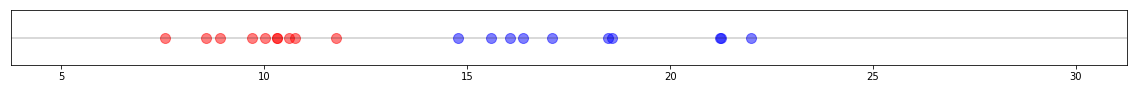

In [0]:
show_1D_dataset_samples(10, n_datasets=1, dot_alpha=.5, line_alpha=0, figsize=(20,1))
plt.axis("on")
plt.ylim(.095, .105)
plt.yticks([])
plt.axhline(.1, color="black", alpha=.2)

Veamos como se puede mejorar la definición de la frontera a medida que aumentamos la cantidad de muestras.

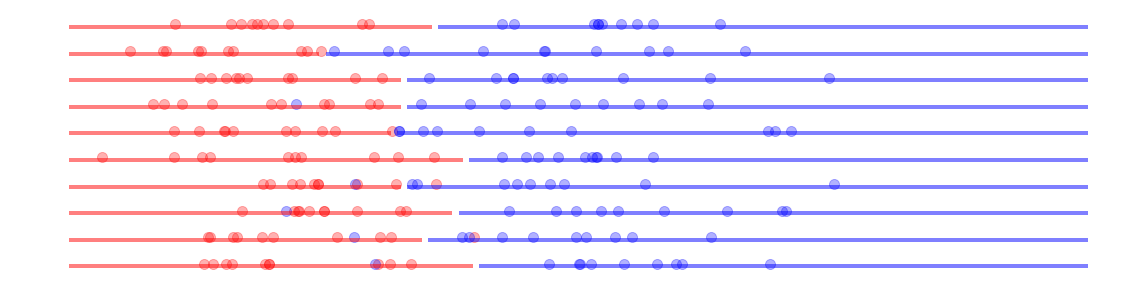

In [0]:
show_1D_dataset_samples(10, dot_alpha=.3)

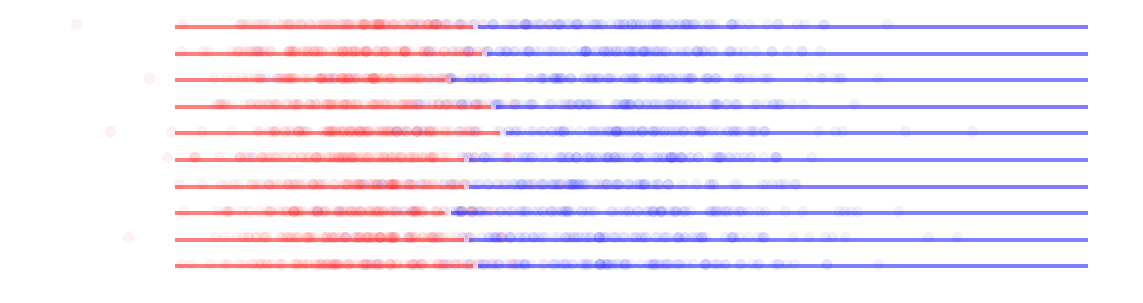

In [0]:
show_1D_dataset_samples(100, dot_alpha=.05)

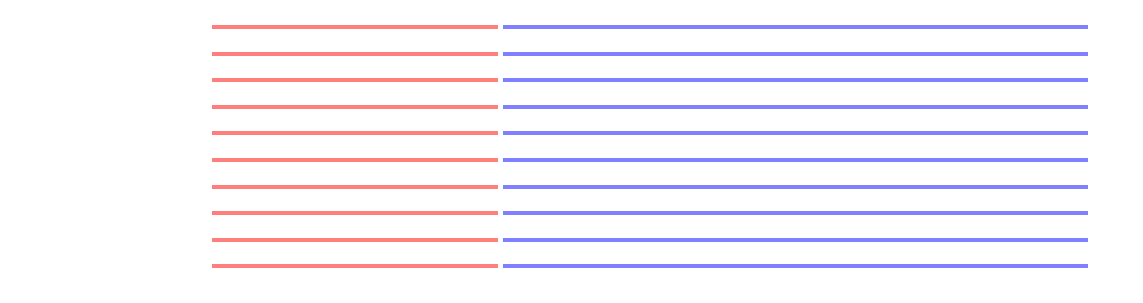

In [0]:
show_1D_dataset_samples(10000, dot_alpha=.001)

### Caso en 2D

- En 2D, un modelo de clasificación **es una frontera** en el plano


- **Objetivo:** hallar la frontera que produce menos error de clasificación


In [0]:
# copiando el archivo mlutils.py en la carpeta local
!wget "https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py"

--2019-08-31 13:38:02--  https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10691 (10K) [text/plain]
Saving to: ‘mlutils.py’

mlutils.py          100%[===================>]  10.44K  --.-KB/s    in 0s      

2019-08-31 13:38:02 (116 MB/s) - ‘mlutils.py’ saved [10691/10691]



In [0]:
import mlutils 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Muestreo de datos "pseudoaleatoria" para clasificar en dos grupos: rojos, azules

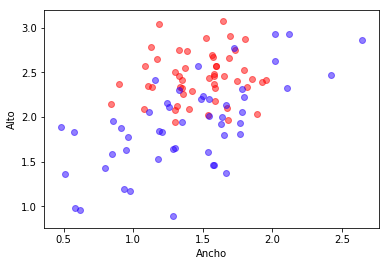

In [0]:
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 2.5], cov0=[[0.1, 0.], [0., 0.1]],
                                        mean1=[1.5, 2.], cov1=[[0.2,0.1],[0.1,.2]])
X,y = mc.sample(100)
mlutils.plot_2Ddata(X, y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador lineal

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


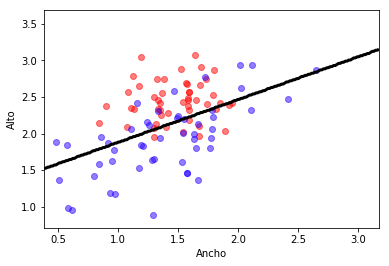

In [0]:
from sklearn.linear_model import LogisticRegression
estimador=LogisticRegression()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador bosque aleatorio

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


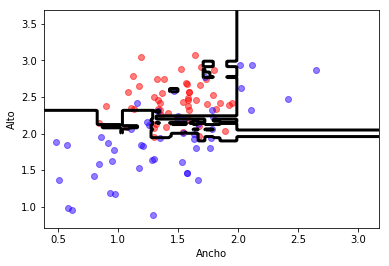

In [0]:
from sklearn.ensemble import RandomForestClassifier
estimador=RandomForestClassifier()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador máquina de soporte vectorial

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


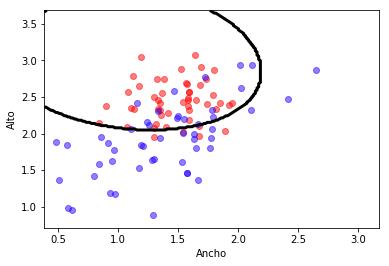

In [0]:
from sklearn.svm import SVC
estimador=SVC()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

**Los algoritmos de machine learning:**

- Los algoritmos de clasificación **calculan fronteras** entre los datos.
- Parten de una muestra de los datos, **no de las distribuciones**.
- Por tanto, **no conocemos** la forma de la frontera bayesiana. O sea, **partimos ciegos**!!!!!!!

Para abordar esta situación, **cualquier algoritmo** tiene necesariamente que plantear una alguna suposición de base:

- los datos vienen de distribuciones normales.
- las columnas son estadísticamente independientes.
- la frontera es lineal, o cuadrática.

Teniendo esto en cuenta, y **partiendo de una muestra de los datos**:

- el objetivo de un usuario de ML es acercarse lo más posible a la **frontera bayesiana** (que no sabemos cómo es).
- distintos algoritmos ML tienen **distintas capacidades** para modelar fronteras (un clasificador lineal no puede captuarar una frontera cuadrática).
- necesitamos dos tipos de herramientas:
   - una buena colección de algoritmos ML.
   - métodos para saber qué tan cerca estamos de la frontera bayesiana.

<p><a name="terms"></a></p>

## 2.2. Terminología

[Contenidos](#contents)

Existen conceptos clave que sientan las bases para una mejor comprensión del ML. Aprenderemos la nomenclatura (términos estándar) que se utiliza para describir los datos, así como los términos utilizados para describir el aprendizaje y el modelado.


La estructura tradicional para los datos en el campo del ML tienen la siguiente forma:

![picture](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2013/12/Table-of-Data-Showing-an-Instance-Feature-and-Train-Test-Datasets.png)

* **Instancia**: A una sola fila de datos se le llama instancia. También se le conoce como una observación del dominio.
* **Característica** (Feature): A una sola columna de datos se le llama característica. Es un componente de una observación y también se denomina atributo de una instancia de datos (La característica se suele asociar con el atributo y su valor, aunque la mayoría de las veces se usa atributo y característica indistintamente). Algunas características pueden ser entradas a un modelo (predictores) y otras pueden ser salidas o las características a predecir (también llamadas *labels*).
* **Datos de entrenamiento**: Conjunto de datos que introducimos a nuestro algoritmo para entrenar nuestro modelo.
* **Datos de prueba**: Conjunto de datos que utilizamos para validar la precisión de nuestro modelo pero que no se utiliza para entrenarlo. Puede llamarse conjunto de datos de validación.

Otros términos que utilizaremos frecuentemente son:

* **Parámetros del modelo**: Son aquellos que pertenecen al modelo utilizado para realizar el procedimiento de ajuste
* **Hiperparámetros**: Es un parámetro de un algoritmo de aprendizaje (no del
modelo). Como tal, no se ve afectado por el algoritmo de aprendizaje en sí; debe establecerse antes
al entrenamiento y permanece constante durante el entrenamiento.
* **Métrica**: Medida cuantitativa usada para evaluar el rendimiento del algoritmo.


<p><a name="supML"></a></p>

## 2.3. Aprendizaje supervisado

[Contenidos](#contents)

El aprendizaje supervisado implica de alguna manera modelar la relación entre las características de los datos y alguna etiqueta asociada a estos; una vez que se determina el modelo, se puede usar para asociar etiquetas a datos nuevos y desconocidos. El aprendizaje supervisado se subdivide en clasificación y regresión: En clasificación se tienen etiquetas discretas, mientras que en la regresión, las etiquetas son cantidades continuas.

### 2.3.1 Clasificación: Prediciendo etiquetas discretas.

En clasificación, tenemos un conjunto de puntos etiquetados y deseamos utilizarlos para clasificar algunos puntos no etiquetados. Imaginemos que tenemos los datos que se muestran en la siguiente figura

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-1.png)

Tenemos dos características para cada punto, representadas por las posiciones (x, y). Además, tenemos una de las dos etiquetas de clases para cada punto, representadas por los colores de los puntos. A partir de estas características y etiquetas, nos gustaría crear un modelo que nos permita decidir si un nuevo punto debe etiquetarse como "azul" o "rojo". Un posible modelo es asumir que los dos grupos pueden separarse dibujando una línea recta a través del plano entre ellos, de modo que los puntos a cada lado de la línea caen en el mismo grupo.

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-2.png)

Este modelo es una versión cuantitativa del enunciado "una línea recta separa las clases", mientras que los parámetros del modelo son los números que describen la ubicación y orientación de la línea. Los valores óptimos para estos parámetros se aprenden de los datos (este es el "aprendizaje" en ML), que a menudo se denomina *entrenar el modelo*. Ahora que el modelo ha sido entrenado, se puede generalizar a datos nuevos sin etiquetas. Esta etapa generalmente se llama *predicción*.


<p><a name="nonsupML"></a></p>

## 2.4. Aprendizaje no supervisado

[Contenidos](#contents)

El aprendizaje supervisado implica de alguna manera modelar la relación entre las características de los datos y alguna etiqueta asociada a estos; una vez que se determina el modelo, se puede usar para asociar etiquetas a datos nuevos y desconocidos. El aprendizaje supervisado se subdivide en clasificación y regresión:

El aprendizaje no supervisado implica modelos que describen datos sin referencia a cualquier etiqueta conocida. Un caso común de aprendizaje no supervisado es el de *agrupamiento* (clustering) en el que los datos se asignan automáticamente a un cierto número de grupos discretos. Por ejemplo, podríamos tener algunos datos bidimensionales

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-1.png)

A simple vista, está claro que cada uno de estos puntos es parte de un grupo distinto. Dada esta entrada, un modelo de agrupamiento utilizará la estructura intrínseca de los datos para determinar qué puntos están relacionados, con un resultado como el siguiente

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-2.png)

Algunos algoritmos de aprendizaje no supervisado son:

* Agrupamiento
  * Jerárquico
  * Basado en densidad
  * k-medias
* Detección de anomalías
* Visualización y reducción dimensional


<p><a name="data"></a></p>

## 2.5. Observaciones acerca de los datos

[Contenidos](#contents)

* **Cantidad insuficiente de datos de entrenamiento**: Se necesitan muchos datos para que la mayoría de los algoritmos de ML funcionen correctamente. Incluso para problemas muy simples, generalmente se necesitan miles de ejemplos, y para problemas complejos como el reconocimiento de imágenes o de voz puede necesitarse millones de ejemplos. 

* **Datos de entrenamiento no representativos**: Para generalizar bien, es crucial que los datos de entrenamiento sean representativos de los nuevos casos que desea generalizar. Al usar un conjunto de entrenamiento no representativo, entrenamos un modelo con el cual es poco probable obtener predicciones precisas. Incluso muestras muy grandes pueden no ser representativas si el método de muestreo es defectuoso (sesgo en el muestreo).

* **Datos de baja calidad**: Obviamente, si los datos de entrenamiento están llenos de errores, valores atípicos y ruido (por ejemplo, debido a mediciones de baja calidad), será más difícil para el algoritmo detectar los patrones subyacentes, por lo que es menos probable que funcione bien. ¡Siempre vale la pena dedicar tiempo a limpiar los datos de entrenamiento!

* **Características irrelevantes**: El sistema solo será capaz de aprender si los datos de entrenamiento contienen suficientes características relevantes y no demasiadas irrelevantes. Una parte fundamental del éxito de un proyecto de ML es crear un buen conjunto de características para el entrenamiento. Este proceso se conoce como ingeniería de características. 

### ¡Los datos son más importantes que los algoritmos!

<p><a name="sklearn"></a></p>

# 3. Introducción a Scikit-Learn

[Contenidos](#contents) 




<p><a name="sklearnG"></a></p>

## 3.1 Generalidades

Hay varias bibliotecas de Python que proporcionan implementaciones sólidas de una variedad de algoritmos de ML. Uno de los más conocidos es Scikit-Learn, un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Scikit-Learn se caracteriza por ser una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa. La API de Scikit-Learn está notablemente bien diseñada. Los principales principios de diseño son:

* **Estimadores**: Cualquier objeto que pueda estimar algunos parámetros basados en un conjunto de datos se llama *estimador*. La estimación en sí misma se realiza mediante el método `fit()`, y solo toma un conjunto de datos como parámetro (o dos para algoritmos de aprendizaje supervisados; el segundo conjunto de datos contiene las etiquetas). Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro. Ya habíamos visto un ejemplo de un estimador cuando realizamos el llenado de valores nulos con `SimpleImputer` (La estrategía de llenado, en este caso "most frequent", es un ejemplo de un hiperparámetro)


In [0]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='most_frequent')

* **Transformadores**: Algunos estimadores (como el imputer) también pueden transformar un conjunto de datos; Estos se llaman transformadores. Una vez más, la API es bastante simple: la transformación se realiza mediante el método `transform()` con el conjunto de datos para transformar como parámetro. Los transformadores también tienen un método conveniente llamado `fit_transform()` que es equivalente a llamar a `fit()` y luego aplicar `transform()`

In [0]:
imp = SimpleImputer(strategy='most_frequent')
transformed_data = pd.DataFrame(imp.fit_transform(X))

* **Predictores**: Finalmente, algunos estimadores son capaces de hacer predicciones dado un conjunto de datos; Estos se conocen como predictores. Un predictor tiene un método `predict()` que toma un conjunto de datos de nuevas instancias y devuelve un conjunto de datos de predicciones correspondientes. También tiene un método `score()` que mide la calidad de las predicciones dado un conjunto de prueba. (El modelo `LinearRegression` que veremos más adelante es un ejemplo de un predictor)


<p><a name="sklearnT"></a></p>

## 3.2 Tratamiento de datos

ML se trata de crear modelos a partir de datos. Por esta razón, comenzaremos discutiendo algunos aspectos necesarios del tratamiento de los datos previos a la aplicación del algoritmo de ML en sklearn

In [0]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/adult.csv') 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


<p><a name="sklearnTT"></a></p>

### 3.2.1 Datos de entrenamiento y de prueba

Comencemos por crear la matrix de características **X** y el vector (serie) de etiquetas **y**. Supongamos que en este caso queremos predecir la característica "age":

In [0]:
X = df.drop("age", axis=1)
X.shape

(48842, 14)

In [0]:
y = df["age"]
y.shape

(48842,)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64




Generalmente se elige el 20% de los datos para la prueba y el resto para el entrenamiento. Los datos se deben dividir eligiendo los datos de manera aleatoria. Existen varias maneras de realizar este proceso

   1) Crear una función que seleccione el 20% de los datos aleatoriamente.
      
   2) De la librería `sklearn.model_selection` usar las funciones:
      
      * train_test_split
       
      * StratifiedShuffleSplit 
      
La primera función dividirá los datos en los mismos índices (esto es muy útil, por ejemplo, si tenemos un DataFrame separado para las etiquetas). La segunda función hace lo que se conoce como un muestreo estratificado, el cual se usa en el caso de que no haya suficientes datos y queramos evitar introducir sesgos




In [0]:
# Cuando tengamos una cantidad de datos tal que estemos seguros que no introduciremos un sesgo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) # random_state nos permite establecer una semilla 

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(39073, 14) (39073,)
(9769, 14) (9769,)


In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

s = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=40)

for train_index, test_index in s.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
  
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(39073, 14) (39073,)
(9769, 14) (9769,)


<p><a name="sklearnCT"></a></p>

### 3.2.2 Conversión de variables categóricas

Para la conversión de variables categóricas, sklearn ofrece los módulos `OrdinalEncoder` y `OneHotEncoder`

In [0]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object

In [0]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df[["education"]])
df_cat_encoded

array([[ 9.],
       [ 9.],
       [11.],
       ...,
       [ 9.],
       [ 9.],
       [ 9.]])

In [0]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
#cat_encoder = OneHotEncoder(sparse=False)
df_cat_1hot = cat_encoder.fit_transform(df[["sex"]])
df_cat_1hot

<48842x2 sparse matrix of type '<class 'numpy.float64'>'
	with 48842 stored elements in Compressed Sparse Row format>

Por defecto el `OneHotEncoder` retorna una matriz dispersa (sparse). Muchos de los estimadores de Sklearn aceptan entradas de este tipo al ajustar y evaluar modelos. 

<p><a name="sklearnFS"></a></p>

### 3.2.3 Escalado de características

Los algoritmos de ML no funcionan bien cuando los atributos numéricos de entrada tienen escalas muy diferentes (o en algunos casos las entradas deben estar normalizadas). Para resolver esto, Scikit-Learn tiene dos funciones para que todos los atributos tengan la misma escala: 

* Normalización  $$
           x'=\frac{x-x_{min}}{x_{max}-x_{min}}.
           $$ 




In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(df[["age"]],df[["hoursperweek"]])

array([[0.5 ],
       [0.75],
       [0.5 ],
       ...,
       [0.5 ],
       [0.5 ],
       [0.25]])

* Estandarización:$$
    x'=\frac{x-\bar x}{\sigma}
    $$

In [0]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
sscaler.fit_transform(df[["age"]],df[["hoursperweek"]])

array([[ 0.17672381],
       [ 0.94870704],
       [ 0.17672381],
       ...,
       [ 0.17672381],
       [ 0.17672381],
       [-0.59525942]])

<p><a name="sklearnPL"></a></p>

### 3.2.4 Pipeline

Un *Pipeline* es una secuencia de transformaciones que se utilizan para automatizar flujos de trabajo. Los pipelines son muy comunes en los sistemas de ML, ya que hay muchos datos para manipular y muchas transformaciones de datos para aplicar. Sklearn proporciona la clase `Pipeline`. En el siguiente ejemplo crearemos un pipeline para 

1) Reemplazar los valores nulos por la media 

2) Estandarizar los datos.


In [0]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

df_age_pipe = num_pipeline.fit_transform(df[["age"]])

trans_age = pd.DataFrame(df_age_pipe)
print(trans_age.std(),trans_age.mean())


0    1.00001
dtype: float64 0   -1.553935e-15
dtype: float64


<p><a name="regresion"></a></p>

# 4. Regresión lineal

[Contenidos](#contents) 

## 4.1 Regresión lineal simple
<p><a name="simple"></a></p>

Para iniciar nuestro estudio de los algorítmos de regresión usaremosuno de los casos más simples posibles:  la regresión lineal.

Como recordarás la ecuación de una línea recta está dada por la ecuación

$$y = m*x+b$$

Donde $y$ es la variable dependiente, $x$ la independiente y a $m$ y $b$ las llamamos pendientes e intercepto.

En el ambito del ML solemos reescribir la ecuación como

$$y=w_0+w_1x$$

siendo $w_0$ y $w_1$ llamados los "parámetros del modelo"



La **pregunta** que nos haríamos sería: dados un conjunto de datos $(x,y)$, ¿Cuáles son los parámetros para una línea que mejor representan *el conjunto* de datos?

En otras palabras, queremos encontrar los $w_i$ que mínimicen el error al predecir $y$ dado un $x$

![Imagen tomada de medium.com](https://miro.medium.com/max/642/1*xxxqZtZExBJoxmYKIY-waw.png)

Existen varios algoritmos para resolver ésta tarea, el más simple es usar el algorítmo de mínimos cuadrados.

El algoritmo encuentra los parámetros que minimizan la el error cuadrado conjunto (la suma) entre nuestras predicciones y los valores reales.

![Imagen tomada de /www.jmp.com](https://www.jmp.com/en_hk/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548704005203.png)

Sklearn cuenta con una sublibrería completa para los modelos lineales llamada "linear_model".

Volvamos a nuestro dataset de autos.

In [0]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [0]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [0]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

Usaremos el tamaño del motor para crear un modelo sencillo para el precio del auto.

In [0]:
#separemos nuestros datos en features y label
X = df['engine-size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

linear  = LinearRegression(normalize=True)
linear.fit(X_train,y_train)
print('R2 =',linear.score(X_test,y_test))


R2 = 0.7735450111026795


In [0]:
print('w1 =',linear.coef_)
print('w0 =',linear.intercept_)

w1 = [[174.5482757]]
w0 = [-8836.38107893]


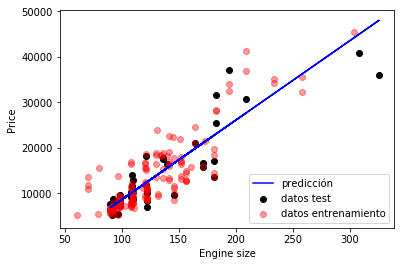

In [0]:
y_pred = linear.predict(X_test)

plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='lower right')

plt.xlabel(r'Engine size')
plt.ylabel(r'Price')

plt.show()


## 4.2 Regresión lineal multiple
<p><a name="multiple"></a></p>


Normalmente los problemas de ML no son tan simples y los datos están compuestos de muchos predictores. En éstos casos podemos usar también el algorítmo de regresión lineal, haciendo una extensión de la ecuación de la linea a más dimensiones:
$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

Donde $n$ será la cantidad de variables predictoras en nuestros datos y de nuevo $w_i$ será el **peso** del predictor $x_i$.

En éstos casos ya no tendremos una línea si no un plano, o hiperplano como modelo.

Veamos un modelo 2D.

Usemos ahora el tamaño del motor y el peso vacío como predictores del precio.

In [0]:
X = df[['engine-size','curb-weight']]
y = df['price']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

linearM  = LinearRegression(normalize=True)
linearM.fit(X_train,y_train)
print('R2 =',linearM.score(X_test,y_test))

R2 = 0.8138779449118414


In [0]:
print('w1, w2 =',linearM.coef_)
print('w0 =',linearM.intercept_)

w1, w2 = [117.18848596   4.97221762]
w0 = -14334.771686602337


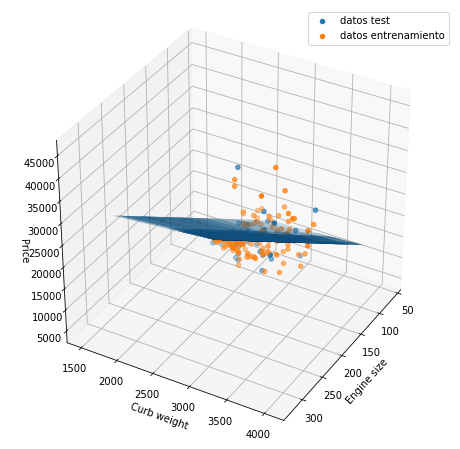

In [0]:
from mpl_toolkits.mplot3d import Axes3D

xx,yy = np.meshgrid(X_test['engine-size'].values, X_test['curb-weight'].values)
zz = linearM.intercept_+linearM.coef_[0]*xx+linearM.coef_[1]*yy

sc = plt.figure(figsize=(8,8)).gca(projection='3d')
sc.scatter(X_test['engine-size'], X_test['curb-weight'], y_test,label=r'datos test')
sc.scatter(X_train['engine-size'], X_train['curb-weight'], y_train,label=r'datos entrenamiento')
sc.plot_surface(xx, yy, zz, alpha=0.05)
sc.legend()

sc.view_init(elev=35, azim=30)
sc.set_xlabel('Engine size')
sc.set_ylabel('Curb weight')
sc.set_zlabel('Price')
plt.show()

LinearRegression usa el método de mínimos cuadrados, ésto hace que los parámetros estimados dependan fuertemente de la independencia de las características.

Cuando las columnas están fuertemente correlacionadas, llamado multicolinealidad,  el algorítmo de mínimos cuadrados es altamente sensible a variaciones aleatorias en la variable diana, haciendo que la varianza sea bastante grande.



## 4.3 Otros estimadores lineales

Dado el problema de multicolinealidad del algorírmo de mínimos cuadrados podemos mencionar dos opciones que vienen implementadas también en sklearn:

*   Regresión Ridge
*   Regresión Lasso




#### 4.3.1 Regresión Ridge
<p><a name="ridge"></a></p>

En éste típo de algorítmo se impondrá una penalidad sobre los coeficientes calculados, de tal manera que se modificará el error de los mínimos cuadrados como:

$$\sum (Y_i-\hat Y_i)^2+\alpha \sum w_i^2 $$


El hiperparámetro $\alpha$, llamado complejidad, controla qué tanto se penaliza los coeficientes, haciendo que éstos sean más pequeños y por tanto estabilizando las soluciones aunque a costa de una menor sesibilidad a los datos.



Para comparar entrenemos un modelo LinearRegresor y uno Ridge con todos los datos

In [0]:
df.dropna(inplace=True)
X = df[['symboling', 'normalized-losses', 'wheel-base', 'length',
       'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'city-L/100km',  'diesel', 'gas']]
y = df['price']

In [0]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

#modelo OLS
linearM  = LinearRegression(normalize=True)
linearM.fit(X_train,y_train)
print('R2 OLS =',linearM.score(X_test,y_test))
print('wi OLS =',linearM.coef_)
print('w0 OLS =',linearM.intercept_)

#Modelo Ridge
print(5*'#')
ridge  = Ridge(alpha=1,normalize=True)
ridge.fit(X_train,y_train)
print('R2 Ridge =',ridge.score(X_test,y_test))
print('wi Ridge =',ridge.coef_)
print('w0 Ridge =',ridge.intercept_)

R2 OLS = 0.8435359669008109
wi OLS = [ 3.21614312e+01 -1.03220246e+01  1.41118840e+02 -2.23572818e+04
  4.32821190e+04  1.74105227e+02 -1.52039826e-01  1.11924260e+02
 -9.95886066e+01 -2.85373944e+03  6.92164686e+02  2.32587030e+01
  1.80134818e+00  2.27747260e+01  2.17008482e+02  1.52150525e+03
 -1.84019329e+03  1.84019329e+03]
w0 OLS = -76507.00943884654
#####
R2 Ridge = 0.7133951662369991
wi Ridge = [ 7.37216191e+01 -3.83731882e-01  6.53044658e+01  5.87166942e+03
  2.54199023e+04  2.68756816e+01  1.45468267e+00  3.67838020e+01
  1.19095810e+03 -4.71217393e+02  8.08538699e+01  2.89763652e+01
  3.06326189e-01 -5.65004684e+01 -5.56486013e+01  3.61066213e+02
  8.67411260e+02 -8.67411260e+02]
w0 Ridge = -38835.23676298204


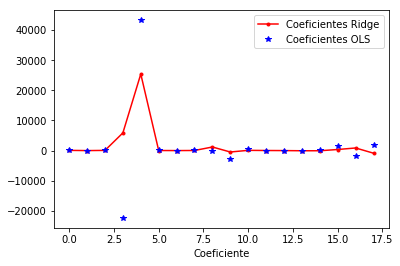

In [0]:
plt.figure()
plt.plot(ridge.coef_,'r.-',label=r'Coeficientes Ridge')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

Vemos que en el caso del dataset para autos con un valor de $\alpha = 1$ se nota una pequeña variación en los parámetros y la precisión del modelo.

El modelo se hace robusto a variaciones de los predictores, pero puerde un poco de precisión (se necesitan más datos para entrenamiento)

En general el hiperparámetro $\alpha$ debe ser  buscado con varios experimentos.


#### 4.3.2 Regresión Lasso
<p><a name="lasso"></a></p>

Al igual que el algorítmo Ridge, Lasso impone una penalidad sobre la función de error del OLS, pero ésta en cambio está dada por el valor absoluto de los coeficientes, así:
$$\sum (Y_i-\hat Y_i)^2+\alpha \sum |w_i|$$

Esto hace que a diferencia de Ridge que buscaba hacer pequeños los valores de algunos $w_i$, Lasso fuerza a que sean 0.

Así, puede decirse que Ridge es bueno cuando esperamos que todos los predictores tengan una influencia sobre el predictor así sea pequeña, mientras que Lasso se usará cuando esperamos que el numero de predictores relevantes sea pequeño (predictores con peso diferente de 0).

Para implementar una regresión tipo Lasso se sigue el mismo esquema de los casos anteriores.

In [0]:
from sklearn.linear_model import Lasso

#modelo Lasso
lasso  = Lasso(alpha=10,normalize=True)
lasso.fit(X_train,y_train)
print('R2 Lasso =',lasso.score(X_test,y_test))
print('wi Lasso =',lasso.coef_)
print('w0 Lasso =',lasso.intercept_)

R2 Lasso = 0.8360932068188104
wi Lasso = [-0.00000000e+00 -3.19883868e+00  0.00000000e+00 -0.00000000e+00
  3.43182211e+04  1.19391461e+02  0.00000000e+00  1.20148466e+02
 -0.00000000e+00 -2.49132114e+03  3.08466036e+02  2.00496318e+01
  1.51785391e+00  0.00000000e+00  0.00000000e+00  5.19565705e+02
  0.00000000e+00 -0.00000000e+00]
w0 Lasso = -49559.07715934429


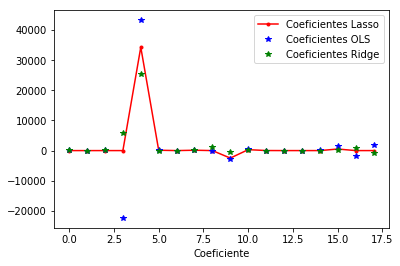

In [0]:
plt.figure()
plt.plot(lasso.coef_,'r.-',label=r'Coeficientes Lasso')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.plot(ridge.coef_,'g*',label=r'Coeficientes Ridge')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

In [0]:
print('numero de coeficientes:',len(linearM.coef_))
print('numero de coeficientes diferentes a cero para Ridge:',len(ridge.coef_[ridge.coef_!=0]))
print('numero de coeficientes diferentes a cero para Lasso:',len(lasso.coef_[lasso.coef_!=0]))

numero de coeficientes: 18
numero de coeficientes diferentes a cero para Ridge: 18
numero de coeficientes diferentes a cero para Lasso: 9


Como vemos, Lasso ha disminuído el número de coeficientes mientras que Ridge no lo hace.

La elección entre éstos 3 tipos de regresión lineal depende fuertemente de nuestro dataset (sus correlaciones), nuestro conocimiento del campo (relaciones esperadas de las variables predictoras y la variable diana) y nuestras necesidades computacionales.

<p><a name="taller"></a></p>

# 5. Taller

[Contenidos](#contents) 

Analizar la tres regresiones lineales vistas en clase y ver la afectación de los resultados al implementar la normalización y la regularización con el parámetro $\alpha$

## Pregunta 1

Cargar el dataset de autos, eliminar las filas con valores nulos y dejar solo las columnas con variables numéricas

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

df.dropna(inplace=True)
dfNum=df[df.columns[df.dtypes=='float64']]

--->

## Pregunta 2

Definir la variable a predecir $y$ como el precio y la matriz de características $X$ con el resto de variables numéricas

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

y=dfNum['price']
X=dfNum.loc[:, dfNum.columns != 'price']


--->

## Pregunta 3

Separar el dataset de cancer en los subsets de entrenamiento (train) y prueba (test).


Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)


--->

## Pregunta 4

Hacer una regresión por mínimos cuadrados y calcular el intercepto, los coeficientes y los score de entrenamiento y prueba  

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

print('Autos dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))


--->

## Pregunta 5

Hacer una regresión de Ridge y calcular el intercepto, los coeficientes, los score de entrenamiento y prueba. 

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:


from sklearn.linear_model import Ridge


linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Autos dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

--->

## Pregunta 6

Hacer normalización de los datos e la misma regresión de Ridge anterior y obtener las mismas métricas.

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Autos dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))


--->

## Pregunta 7

Implementar la regresión de Ridge con las variables escaldas para los siguientes valores del parámetro de regularización $\alpha=[0, 1, 10, 20, 50, 100, 1000]$

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))


--->

## Pregunta 8

Realizar los mismos calculos de las preguntas 5-7 pero esta vez para la regresión de Lasso

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Autos dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))


print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))


--->